In [1]:
## deeplearning.pdf 교재로 사용(이어서 학습)
'''
최소제곱법
최소 제곱법 공식으로 구한 성적 예측 코딩
'''

import numpy as np
# x 값과 y 값
x=[2, 4, 6, 8]
y=[81, 93, 91, 97]

# x와 y의 평균값
mx = np.mean(x)
my = np.mean(y)
print("x의 평균값:", mx)
print("y의 평균값:", my)

# 기울기 공식의 분모
divisor = sum([(mx - i)**2 for i in x])

# 기울기 공식의 분자
def top(x, mx, y, my):
    d = 0
    for i in range(len(x)):
        d += (x[i] - mx) * (y[i] - my)
    return d

dividend = top(x, mx, y, my)

print("분모:", divisor)
print("분자:", dividend)

# 기울기와 y 절편 구하기
a = dividend / divisor
b = my - (mx*a)

# 출력으로 확인
print("기울기 a =", a)
print("y 절편 b =", b)

x의 평균값: 5.0
y의 평균값: 90.5
분모: 20.0
분자: 46.0
기울기 a = 2.3
y 절편 b = 79.0


In [2]:
'''
평균 제곱근 오차(root mean square error) 구현 코드
'''
import numpy as np

# 기울기 a와 y 절편 b
ab = [3, 76]

# x, y의 데이터 값
data = [[2, 81], [4, 93], [6, 91], [8, 97]]
x = [i[0] for i in data]
y = [i[1] for i in data]

# y = ax + b에 a와 b 값을 대입하여 결과를 출력하는 함수
def predict(x):
    return ab[0]*x + ab[1]

# RMSE 함수
def rmse(p, a):
    return np.sqrt(((p - a) ** 2).mean())

# RMSE 함수를 각 y 값에 대입하여 최종 값을 구하는 함수
def rmse_val(predict_result,y):
    return rmse(np.array(predict_result), np.array(y))

# 예측 값이 들어갈 빈 리스트
predict_result = []

# 모든 x 값을 한 번씩 대입하여
for i in range(len(x)):
    # predict_result 리스트를 완성한다.
    predict_result.append(predict(x[i]))
    print("공부한 시간 = %.f, 실제 점수 = %.f, 예측 점수 = %.f" % (x[i], y[i], predict(x[i])))
# 최종 RMSE 출력
print("rmse 최종값: " + str(rmse_val(predict_result,y)))


공부한 시간 = 2, 실제 점수 = 81, 예측 점수 = 82
공부한 시간 = 4, 실제 점수 = 93, 예측 점수 = 88
공부한 시간 = 6, 실제 점수 = 91, 예측 점수 = 94
공부한 시간 = 8, 실제 점수 = 97, 예측 점수 = 100
rmse 최종값: 3.3166247903554


In [5]:
'''
오차를 줄여나가는 방법을 알아보자 
오차 수정 – 경사하강법(gradient decent)
 기울기 a를 무한대로 키우면 오차도 무한대로 커지고 a를 무한대로 작게 해도 역시 오차도 무한대로 
  작아지는 상관관계는 이차 함수 그래프로 표현할 수 있습니다.

(p.50)
 y = X2 그래프에서 X에 a1 , a2그리고 m을 대입하여 미분하면 각 점에서의 순간 기울기가 그려집니다.
 '순간 기울기가 0인 점이 최솟값 m이다.'
 그래프가 이차 함수 포물선이므로 꼭짓점의 기울기는 x축과 평행한 선이 되며, 기울기가 0입니다.
 경사 하강법은 반복적으로 기울기 a를 변화시켜서 m의 값을 찾아내는 방법 (‘미분 값이 0인 지점’을 찾는
것)입니다.
'''

'''
• 오차가 가장 작을 때는 x가 그래프의 가장 아래쪽의 볼록한 부분에
이르렀을 때입니다.
• 즉, 기울기 a가 m 위치에 있을 때입니다.
• 컴퓨터를 이용해 m의 값을 구하려면 임의의 한 점(a1)을 찍고 이 점
을 m에 가까운 쪽으로 점점 이동(a1 → a2 → a3)시키는 과정이 필요
합니다.
• ( a1의 값보다 a2의 값이 m에 더 가깝고 a2의 값보다 a3가 m에 더
가깝다는 것을 컴퓨터가 알아야 하겠지요)
• 미분 기울기를 이용하는 경사 하강법(gradient decent)은 이차 함수
그래프에서 오차를 비교하여 가장 작은 방향으로 이동시키는 방법입
니다.

→ 기울기 a와 오차와의 관계: 적절한 기울기를 찾았을 때 오차가 최소화된다
'''

'''
미분 
 Y = X2 이라는 그래프의 x축에 한 점 a가 있을 때 y 값은 Y = a2 입니다.
 a가 아주 미세하게 오른쪽이나 왼쪽으로 이동하면 종속 변수인 y 값도 그에 따라 아주 미세하게 변화합니
다.
 a가 변화량이 0에 가까울 만큼 아주 미세하게 변화하면 y 값의 변화 역시 아주 미세해서 0에 가깝게 변화
합니다. (순간변화율)
 순간 변화율은 ‘어느 쪽’이라는 방향성을 지니고 있으므로 이 방향에 맞추어 직선(점에서의 ‘기울기’, 접선)
을 그릴 수가 있습니다.
 미분은 x 값이 아주 미세하게 움직일 때의 y 변화량을 구한 뒤, 이를 x의 변화량으로 나누는 과정입니다.
'''

'''
도함수
어떤 함수 안에 포함도나 값 각각이 0에 한없이 가까워지는 극한값(미분계수)을 구하는 함수 
y = f(x)의 도함수 f'(x)는 lim{ f(x+◁x) - f(x) / ◁x }
'''


import tensorflow as tf
# x, y의 데이터 값
data = [[2, 81], [4, 93], [6, 91], [8, 97]]
x_data = [x_row[0] for x_row in data]
y_data = [y_row[1] for y_row in data]

# 기울기 a와 y 절편 b의 값을 임의로 정한다.
# 단, 기울기의 범위는 0 ~ 10 사이이며, y 절편은 0 ~ 100 사이에서 변하게 한다.
a = tf.Variable(tf.random_uniform([1], 0, 10, dtype = tf.float64,seed = 0))
b = tf.Variable(tf.random_uniform([1], 0, 100, dtype = tf.float64, seed = 0))

# y에 대한 일차 방정식 ax+b의 식을 세운다.
y = a * x_data + b

# 텐서플로 RMSE 함수
rmse = tf.sqrt(tf.reduce_mean(tf.square( y - y_data )))

# 학습률 값
learning_rate = 0.1

# RMSE 값을 최소로 하는 값 찾기
gradient_decent = tf.train.GradientDescentOptimizer(learning_rate).minimize(rmse)

# 텐서플로를 이용한 학습
with tf.Session() as sess:
    # 변수 초기화
    sess.run(tf.global_variables_initializer())
    # 2001번 실행(0번째를 포함하므로)
    for step in range(2001):
        sess.run(gradient_decent)
        # 100번마다 결과 출력
        if step % 100 == 0:
            print("Epoch: %.f, RMSE = %.04f, 기울기 a = %.4f, y 절편b = %.4f" % (step,sess.run(rmse),
                                                                                 sess.run(a),sess.run(b)))
        # 약 1300번째부터 기울기 값이,
        #    1800번째부터 절편 값이 고정되는 것을 확인 

Epoch: 0, RMSE = 30.2139, 기울기 a = 7.5235, y 절편b = 80.5984
Epoch: 100, RMSE = 2.8860, 기울기 a = 2.2299, y 절편b = 79.4181
Epoch: 200, RMSE = 2.8826, 기울기 a = 2.2601, y 절편b = 79.2379
Epoch: 300, RMSE = 2.8815, 기울기 a = 2.2773, y 절편b = 79.1353
Epoch: 400, RMSE = 2.8811, 기울기 a = 2.2871, y 절편b = 79.0770
Epoch: 500, RMSE = 2.8810, 기울기 a = 2.2927, y 절편b = 79.0438
Epoch: 600, RMSE = 2.8810, 기울기 a = 2.2958, y 절편b = 79.0249
Epoch: 700, RMSE = 2.8810, 기울기 a = 2.2976, y 절편b = 79.0142
Epoch: 800, RMSE = 2.8810, 기울기 a = 2.2987, y 절편b = 79.0081
Epoch: 900, RMSE = 2.8810, 기울기 a = 2.2992, y 절편b = 79.0046
Epoch: 1000, RMSE = 2.8810, 기울기 a = 2.2996, y 절편b = 79.0026
Epoch: 1100, RMSE = 2.8810, 기울기 a = 2.2998, y 절편b = 79.0015
Epoch: 1200, RMSE = 2.8810, 기울기 a = 2.2999, y 절편b = 79.0008
Epoch: 1300, RMSE = 2.8810, 기울기 a = 2.2999, y 절편b = 79.0005
Epoch: 1400, RMSE = 2.8810, 기울기 a = 2.3000, y 절편b = 79.0003
Epoch: 1500, RMSE = 2.8810, 기울기 a = 2.3000, y 절편b = 79.0002
Epoch: 1600, RMSE = 2.8810, 기울기 a = 2.3000, y 절편b =

In [7]:
# 경사 하강법으로 다중 선형 회귀 구현 코드
'''
ex/ 공부한 시간 = x1, 과외수업횟수 = x2 성적 = y 로 독립변수와 종속변수 지정 
y = a1*x1 + a2*x2 + b
'''

import tensorflow as tf

# x1, x2, y의 데이터 값
data = [[2, 0, 81], [4, 4, 93], [6, 2, 91], [8, 3, 97]]
x1 = [x_row1[0] for x_row1 in data]
x2 = [x_row2[1] for x_row2 in data] # 새로 추가되는 값
y_data = [y_row[2] for y_row in data]

# 기울기 a와 y 절편 b의 값을 임의로 정한다.
# 단, 기울기의 범위는 0 ~ 10 사이이며, y 절편은 0 ~ 100 사이에서 변하게 한다.
a1 = tf.Variable(tf.random_uniform([1], 0, 10, dtype=tf.float64, seed=0))
a2 = tf.Variable(tf.random_uniform([1], 0, 10, dtype=tf.float64, seed=0)) # 새로 추가되는 값
b = tf.Variable(tf.random_uniform([1], 0, 100, dtype=tf.float64, seed=0))

# 새로운 방정식
y = a1 * x1 + a2 * x2+ b

# 텐서플로 RMSE 함수
rmse = tf.sqrt(tf.reduce_mean(tf.square( y - y_data )))

# 학습률 값
learning_rate = 0.1

# RMSE 값을 최소로 하는 값 찾기
gradient_decent = tf.train.GradientDescentOptimizer(learning_rate).minimize(rmse)

# 학습이 진행되는 부분
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(2001):
        sess.run(gradient_decent)
        if step % 100 == 0:
            print("Epoch: %.f, RMSE = %.04f, 기울기 a1 = %.4f, 기울기 a2 = %.4f, y 절편 b = %.4f" 
                  % (step,sess.run(rmse), sess.run(a1), sess.run(a2),sess.run(b)))
            # 오차율이 가장 적은 지점은 약 100번 지점익 그 이후부터는 오히려 조금 늘어났다가 고정됨 

Epoch: 0, RMSE = 49.1842, 기울기 a1 = 7.5270, 기울기 a2 = 7.8160, y 절편 b = 80.5980
Epoch: 100, RMSE = 1.8368, 기울기 a1 = 1.1306, 기울기 a2 = 2.1316, y 절편 b = 78.5119
Epoch: 200, RMSE = 1.8370, 기울기 a1 = 1.1879, 기울기 a2 = 2.1487, y 절편 b = 78.1057
Epoch: 300, RMSE = 1.8370, 기울기 a1 = 1.2122, 기울기 a2 = 2.1571, y 절편 b = 77.9352
Epoch: 400, RMSE = 1.8370, 기울기 a1 = 1.2226, 기울기 a2 = 2.1607, y 절편 b = 77.8636
Epoch: 500, RMSE = 1.8370, 기울기 a1 = 1.2269, 기울기 a2 = 2.1622, y 절편 b = 77.8335
Epoch: 600, RMSE = 1.8370, 기울기 a1 = 1.2288, 기울기 a2 = 2.1628, y 절편 b = 77.8208
Epoch: 700, RMSE = 1.8370, 기울기 a1 = 1.2295, 기울기 a2 = 2.1631, y 절편 b = 77.8155
Epoch: 800, RMSE = 1.8370, 기울기 a1 = 1.2299, 기울기 a2 = 2.1632, y 절편 b = 77.8133
Epoch: 900, RMSE = 1.8370, 기울기 a1 = 1.2300, 기울기 a2 = 2.1632, y 절편 b = 77.8124
Epoch: 1000, RMSE = 1.8370, 기울기 a1 = 1.2301, 기울기 a2 = 2.1633, y 절편 b = 77.8120
Epoch: 1100, RMSE = 1.8370, 기울기 a1 = 1.2301, 기울기 a2 = 2.1633, y 절편 b = 77.8118
Epoch: 1200, RMSE = 1.8370, 기울기 a1 = 1.2301, 기울기 a2 = 2.1633, y

In [10]:
'''
로지스틱 회귀(logistic regression)
 로지스틱 회귀는 선형 회귀와 마찬가지로 적절한 선을 그려가는 과정입니다. 다만, 직선이 아니라, 참(1)과
거짓(0) 사이를 구분하는 S자 형태의 선을 그어 주는 작업입니다.
'''
'''
시그모이드 함수(sigmoid function)
 S자 형태로 그래프가 그려지는 함수
 e는 자연 상수라고 불리는 무리수로 값은 2.71828...입니다.
 a는 그래프의 경사도를 결정합니다.
 a 값이 커지면 경사가 커지고 a 값이 작아지면 경사가 작아집니다
 b는 그래프의 좌우 이동을 의미합니다.
 b 값이 크고 작아짐에 따라 그래프가 이동합니다.

기울기와 절편 
a가 작아질수록 오차는 무한대로 커지지만, a가 커진다고 해서 오차가 무한대로 커지지는 않는다.
b 값이 너무 작아지거나 커지면 오차도 무한대로 커진다. 이차 함수 그래프로 표현할 수 있습니다.
'''

'''
오차공식
 시그모이드 함수에서 a와 b의 값은 경사 하강법(오차를 구한 다음 오차가 작은 쪽으로 이동시키는 방법)
으로 구합니다
 시그모이드 함수의 특징은 y 값이 0과 1 사이 입니다.
 실제 값이 1일 때 예측 값이 0에 가까워지면 오차가 커져야 합니다.
 실제 값이 0일 때 예측 값이 1에 가까워지는 경우에도 오차는 커져야 합니다.

로그함수
예측 값이 1일 때 오차가 0이고, 예측 값이 0에 가까울수록 오차는 커지는 로그함수 그래프
-log h

예측 값이 0일 때 오차가 없고, 1에 가까워질수록 오차가 매우 커지는 로그함수 그래프
-log (1 - h)

 y의 실제 값이 1일 때 -log h 그래프를 쓰고, 0일 때 -log (1 - h) 그래프를 써야 합니다.
 실제 값 y가 1이면 B 부분이 없어집니다. 반대로 0이면 A 부분이 없어집니다.
'''

# 로지스틱 회귀 구현 코드

import tensorflow as tf
import numpy as np

# x, y의 데이터 값
data = [[2, 0], [4, 0], [6, 0], [8, 1], [10, 1], [12, 1], [14,1]]
x_data = [x_row[0] for x_row in data]
y_data = [y_row[1] for y_row in data]

# a와 b의 값을 임의로 정한다.
a = tf.Variable(tf.random_normal([1], dtype=tf.float64, seed=0))
b = tf.Variable(tf.random_normal([1], dtype=tf.float64, seed=0))

# y 시그모이드 함수의 방정식을 세운다.
y = 1/(1 + np.e**(a * x_data + b))

# loss를 구하는 함수
loss = -tf.reduce_mean(np.array(y_data) * tf.log(y) + (1 -np.array(y_data)) * tf.log(1 - y))

# 학습률 값
learning_rate = 0.5

# loss를 최소로 하는 값 찾기
gradient_decent = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

# 학습
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(78001):
        sess.run(gradient_decent)
        if i % 6000 == 0:
            print("Epoch: %.f, loss = %.4f, 기울기 a = %.4f, y 절편= %.4f" 
                            % (i, sess.run(loss), sess.run(a), sess.run(b)))

Epoch: 0, loss = 1.2676, 기울기 a = 0.1849, y 절편= -0.4334
Epoch: 6000, loss = 0.0152, 기울기 a = -2.9211, y 절편= 20.2981
Epoch: 12000, loss = 0.0081, 기울기 a = -3.5637, y 절편= 24.8010
Epoch: 18000, loss = 0.0055, 기울기 a = -3.9557, y 절편= 27.5463
Epoch: 24000, loss = 0.0041, 기울기 a = -4.2380, y 절편= 29.5231
Epoch: 30000, loss = 0.0033, 기울기 a = -4.4586, y 절편= 31.0675
Epoch: 36000, loss = 0.0028, 기울기 a = -4.6396, y 절편= 32.3346
Epoch: 42000, loss = 0.0024, 기울기 a = -4.7930, y 절편= 33.4086
Epoch: 48000, loss = 0.0021, 기울기 a = -4.9261, y 절편= 34.3406
Epoch: 54000, loss = 0.0019, 기울기 a = -5.0436, y 절편= 35.1636
Epoch: 60000, loss = 0.0017, 기울기 a = -5.1489, y 절편= 35.9005
Epoch: 66000, loss = nan, 기울기 a = nan, y 절편= nan
Epoch: 72000, loss = nan, 기울기 a = nan, y 절편= nan
Epoch: 78000, loss = nan, 기울기 a = nan, y 절편= nan


In [16]:
'''
여러 입력 값을 갖는 로지스틱 회귀 코드 구현
 tf.placeholder(‘데이터형’, ’행렬의 차원’, ’이름’) 는 입력 값을 저장하는데 사용합니다..
 a1x1 + a2x2는 행렬곱을 이용해 [a1, a] * [x1, x2]로도 표현할 수 있습니다
 텐서플로에서는 matmul() 함수를 이용해 행렬곱을 적용합니다
 텐서플로 내장 sigmoid() 함수 - 시그모이드를 계산
'''

import tensorflow as tf
import numpy as np
# 실행할 때마다 같은 결과를 출력하기 위한 seed 값 설정
seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)
# x, y의 데이터 값
x_data = np.array([[2, 3],[4, 3],[6, 4],[8, 6],[10, 7],[12,8],[14, 9]])
y_data = np.array([0, 0, 0, 1, 1, 1,1]).reshape(7, 1)
# 입력 값을 플레이스 홀더에 저장
X = tf.placeholder(tf.float64, shape=[None, 2])
Y = tf.placeholder(tf.float64, shape=[None, 1])

# 기울기 a와 바이어스 b의 값을 임의로 정함
a = tf.Variable(tf.random_uniform([2,1], dtype=tf.float64))

# [2,1] 의미: 들어오는 값은 2개, 나가는 값은 1개
b = tf.Variable(tf.random_uniform([1], dtype=tf.float64))
y = tf.sigmoid(tf.matmul(X, a) + b) # y 시그모이드 함수의 방정식을 세움
loss = -tf.reduce_mean(Y * tf.log(y) + (1 - Y) * tf.log(1 - y)) # 오차를 구하는 함수
learning_rate=0.1 # 학습률 값

# 오차를 최소로 하는 값 찾기
gradient_decent = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
predicted = tf.cast(y > 0.5, dtype=tf.float64)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float64))

sess = tf.Session() #학습(session 안닫히게 with 제외)
sess.run(tf.global_variables_initializer())
for i in range(3001):
    a_, b_, loss_, _ = sess.run([a, b, loss, gradient_decent], feed_dict={X: x_data, Y: y_data})
    if (i + 1) % 300 == 0:
        print("step=%d, a1=%.4f, a2=%.4f, b=%.4f, loss=%.4f"% (i + 1, a_[0], a_[1], b_, loss_))

step=300, a1=0.8731, a2=-0.6778, b=-2.1960, loss=0.2813
step=600, a1=0.8668, a2=-0.3881, b=-3.7214, loss=0.1998
step=900, a1=0.7702, a2=-0.0451, b=-4.8190, loss=0.1552
step=1200, a1=0.6607, a2=0.2738, b=-5.6836, loss=0.1264
step=1500, a1=0.5569, a2=0.5569, b=-6.3982, loss=0.1063
step=1800, a1=0.4635, a2=0.8058, b=-7.0076, loss=0.0915
step=2100, a1=0.3808, a2=1.0248, b=-7.5389, loss=0.0803
step=2400, a1=0.3080, a2=1.2186, b=-8.0101, loss=0.0715
step=2700, a1=0.2437, a2=1.3913, b=-8.4333, loss=0.0644
step=3000, a1=0.1866, a2=1.5464, b=-8.8176, loss=0.0585


In [17]:
#기존 세션 종류 
new_x = np.array([7, 6.]).reshape(1, 2) # [7, 6]은 각각 공부한 시간과 과외 수업 횟수
new_y = sess.run(y, feed_dict={X: new_x})

print("공부한 시간: %d, 과외 수업 횟수: %d" % (new_x[:,0], new_x[:,1]))
print("합격 가능성: %6.2f %%" % (new_y*100))

공부한 시간: 7, 과외 수업 횟수: 6
합격 가능성:  85.42 %


In [2]:
'''
퍼셉트론(perceptron)
 뉴런과 뉴런이 서로 새로운 연결을 만들기도 하고 필요에 따라 위치를 바꾸는 것처럼, 여러 층의 퍼셉트
론을 서로 연결시키고 복잡하게 조합하여 주어진 입력 값에 대한 판단을 하게 하는 것
 퍼셉트론은 입력 값과 활성화 함수를 사용해 출력 값을 다음으로 넘기는 가장 작은 신경망 단위
 N개의 이진수가 하나의 뉴런을 통과해서 가중합 0보다 크면 활성화되는 가장 간단한 신경망 구조
 초평면(hyperplane)으로 구분되는 두 개의 공간을 분리시키는 역할을 한다
 AND 게이트 , OR 게이트를 만들 수 있다.

가중합 - 입력 값(x)과 가중치(w)의 곱을 모두 더한 값에 바이어스(b)를 더한 값
 가중합의 결과를 놓고 1 또는 0을 출력해서 다음으로 보냅니다.
 활성화 함수(activation function) - 0과 1을 판단하는 함수
'''

'''
exclusive OR) 문제
 XOR(exclusive OR) - 둘 중 하나만 1일 때 1이 출력
 결괏값이 0이면 흰점으로, 1이면 검은점으로 각각 그래프로 좌표 평면에 표현
AND와 OR 게이트는 직선을 그어 결괏값이 1인 값(검은점)을 구별할 수 있습니다.
XOR의 경우 선을 그어 구분할 수 없습니다

 좌표 평면 자체에 변화를 주는 것
 XOR 문제를 해결하기 위해서 우리는 두 개의 퍼셉트론을 한 번에 계산할 수 있어야 합니다.

 은닉층(hidden layer)
퍼셉트론(perceptron)
 입력 값(input)을 놓고 파란색(위)과 빨간색(아래)의 영역을 구분한다고 할 때, 왼쪽은 어떤 직선으로도 이
를 해결할 수 없습니다.
 은닉층을 만들어 공간을 왜곡하면 두 영역을 가로지르는 선이 직선으로 바뀝니다
 은닉층이 좌표 평면을 왜곡시키는 결과를 가져옵니다.
'''

'''
다층 퍼셉트론(perceptron)
 은닉층으로 퍼셉트론이 각각 자신의 가중치(w)와 바이어스(b) 값을 보내고
 은닉층에서 모인 값이 한 번 더 시그모이드 함수(기호로 σ 라고 표시합니다)를 이용해 최종 값으로 결과
를 보냅니다.
 은닉층에 모이는 중간 정거장을 노드(node)라고 하며, (n1과 n2)
 은닉층의 노드 n1과 n2의 값은 각각 단일 퍼셉트론의 값과 같습니다.
74
딥러닝 동작원리
 두 식의 결괏값이 출력층으로 보내집니다.
 출력층에서는 시그모이드 함수를 통해 y 값이 정해
집니다.
''' 

# XOR 문제의 해결 코드 구현

import numpy as np

# 가중치와 바이어스
w11 = np.array([-2, -2])
w12 = np.array([2, 2])
w2 = np.array([1, 1])
b1 = 3
b2 = -1
b3 = -1

# 퍼셉트론
def MLP(x, w, b):
    y = np.sum(w * x) + b
    if y <= 0:
        return 0
    else:
        return 1

# NAND 게이트
def NAND(x1, x2):
    return MLP(np.array([x1, x2]), w11, b1)

# OR 게이트
def OR(x1, x2):
    return MLP(np.array([x1, x2]), w12, b2)

# AND 게이트
def AND(x1, x2):
    return MLP(np.array([x1, x2]), w2, b3)

# XOR 게이트
def XOR(x1, x2):
    return AND(NAND(x1, x2),OR(x1, x2))

# x1, x2 값을 번갈아 대입해 가며 최종값 출력
if __name__ == '__main__':
    for x in [(0, 0), (1, 0), (0, 1), (1, 1)]:
        y = XOR(x[0], x[1])
        print("입력 값: " + str(x) + " 출력 값: " + str(y))

입력 값: (0, 0) 출력 값: 0
입력 값: (1, 0) 출력 값: 1
입력 값: (0, 1) 출력 값: 1
입력 값: (1, 1) 출력 값: 0


In [5]:
'''
오차 역전파 (back propagation)
 다층 퍼셉트론에서의 최적화 과정
 가중치에서 기울기를 빼도 값의 변화가 없을 때까지 계속해서 가중치 수정 작업을 반복하는 것
 출력층으로부터 하나씩 앞으로 되돌아가며 각 층의 가중치를 수정하는 방법
 가중치를 수정하려면 미분 값, 즉 기울기가 필요합니다

 신경망 내부의 가중치는 오차 역전파 방법을 사용해 수정합니다.
 임의의 가중치를 선언하고 최소 제곱법을 이용해 오차를 구한 뒤 이 오차가 최소인 지점으로 계속해서 조
금씩 이동시킵니다.
 오차가 최소가 되는 점(미분했을 때 기울기가 0이 되는 지점)이 우리가 알고자 하는 답입니다
'''

'''
활성화 함수 - 기울기 소실 문제 해결
 활성화 함수 시그모이드는 층이 늘어나면서 기울기가 중간에 0이 되어버리는 기울기 소실(vanishing
gradient) 문제가 발생합니다.
 시그모이드를 미분하면 최대치가 0.3입니다. 1보다 작으므로 계속 곱하다 보면 0에 가까워집니다.
 시그모이드는 층을 거쳐 갈수록 기울기가 사라져 가중치를 수정하기가 어려워집니다.

→ 기울기가 사라지는 문제를 해결하기 위해 활성화 함수를 시그모이드가 아닌 여러 함수로 대체하기 시작

• 하이퍼볼릭 탄젠트(tanh) - 시그모이드 함수의 범위를 -1에서 1로 확장, 미분한 값의 범위가 함께 확장 되는 효과를 가져왔습니다.
여전히 1보다 작은 값이 존재하므로 기울기 소실 문제는 사라지지 않습니다.
• 렐루(ReLU) - x가 0보다 작을 때는 모든 값을 0으로 처리하고, 0보다 큰 값은 x를 그대로 사용하는 방법
x가 0보다 크기만 하면 미분 값이 1이 됩니다. 따라서 여러 은닉층을 거치며 곱해지더라도 맨 처음 층까지 사라지지 않고
남아있을 수 있습니다.
'''


'''
확률적 경사 하강법(SGD)
 경사 하강법은 정확하게 가중치를 찾아가지만, 한 번 업데이트할 때마다 전체 데이터를 미분해야 하므로
계산량이 매우 많다는 단점이 있습니다.
 확률적 경사 하강법은 전체 데이터를 사용하는 것이 아니라, 랜덤하게 추출한 일부 데이터를 사용합니다.
일부 데이터를 사용하므로 더 빨리, 자주 업데이트를 하는 것이 가능해졌습니다.
 확률적 경사 하강법은 중간 결과의 진폭이 크고 불안정해 보일 수도 있습니다.
 속도가 빠르면서도 최적 해에 근사한 값을 찾아낸다는 장점 때문에 경사 하강법의 대안으로 사용되고 있
습니다.

모멘텀(momentum)
 관성, 탄력, 가속도라는 뜻
 모멘텀 SGD- 경사 하강법에 탄력을 더해 주는 것
경사 하강법과 마찬가지로 매번 기울기를 구하지만, 이를 통해 오차를 수정하기 전 바로 앞
수정 값과 방향(+, -)을 참고하여 같은 방향으로 일정한 비율만 수정되게 하는 방법
수정 방향이 양수(+) 방향으로 한 번, 음수(-) 방향으로 한 번 지그재그로 일어나는 현상이
줄어들고, 이전 이동 값을 고려하여 일정 비율만큼만 다음 값을 결정하므로 관성의 효과를
낼 수 있습니다.

이외 고급 경사 하강법의 Keras 사용법 p.84 참고
'''

# Keras를 활용한 실습 
# 폐암 수술 환자의 생존율 예측하기 실습
# 딥러닝을 구동하는 데 필요한 케라스 함수를 불러옵니다.

from keras.models import Sequential
from keras.layers import Dense

# 필요한 라이브러리를 불러옵니다.
import numpy
import tensorflow as tf

# 실행할 때마다 같은 결과를 출력하기 위해 설정하는 부분입니다.
seed = 0
numpy.random.seed(seed)
tf.set_random_seed(seed)

# 준비된 수술 환자 데이터를 불러들입니다.

#in jupyter 
#Data_set = numpy.loadtxt("data/ThoraricSurgery.csv" , delimiter=",") 

#in colab
Data_set = numpy.loadtxt("/content/drive/My Drive/Colab Notebooks/싸이킷런 머신러닝(박태정T)/data/ThoraricSurgery.csv" , delimiter=",") 
display(Data_set)

# 환자의 기록과 수술 결과를 X와 Y로 구분하여 저장합니다.
X = Data_set[:,0:17]
Y = Data_set[:,17]

array([[293.  ,   1.  ,   3.8 , ...,   0.  ,  62.  ,   0.  ],
       [  1.  ,   2.  ,   2.88, ...,   0.  ,  60.  ,   0.  ],
       [  8.  ,   2.  ,   3.19, ...,   0.  ,  66.  ,   1.  ],
       ...,
       [406.  ,   6.  ,   5.36, ...,   0.  ,  62.  ,   0.  ],
       [ 25.  ,   8.  ,   4.32, ...,   0.  ,  58.  ,   1.  ],
       [447.  ,   8.  ,   5.2 , ...,   0.  ,  49.  ,   0.  ]])

In [7]:
# 딥러닝 구조를 결정합니다(모델을 설정하고 실행).
model = Sequential() #딥러닝의 구조를 짜고 층을 설정

# 첫 번째 은닉층에 input_dim을 적어 줌으로써 첫 번째 Dense가 은닉층 + 입력층의 역할을 겸합니다.
# 데이터에서 17개의 값을 받아 은닉층의 30개 노드로 보낸다
model.add(Dense(30, input_dim=17, activation='relu')) #activation : 출력층으로 전달할 때 사용할 활성화 함수
model.add(Dense(1, activation='sigmoid')) #출력층의 노드 수는 1개, 최종 출력 값에 사용될 활성화 함수

# 딥러닝을 실행합니다. (오차 함수 : 평균 제곱 오차 함수 사용)
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.fit(X, Y, epochs=30, batch_size=10)

# 결과를 출력합니다.
print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))


''' 실습 복기 
 평균 제곱 오차는 수렴하기까지 속도가 많이 걸린다는 단점이 있다
 교차 엔트로피는 출력 값에 로그를 취해서, 오차가 커지면 수렴 속도가 빨라지고 오차가 작아지면 속도가 감소하게
끔 만듭니다.
 metrics 함수는 모델이 컴파일될 때 모델 수행 결과를 나타내게끔 설정하는 부분입니다. 정확도를 측정하기 위해 사
용되는 테스트 샘플을 학습 과정에서 제외시킴으로써 과적합 문제(over fitting, 특정 데이터에서는 잘 작동하나 다른
데이터에서는 잘 작동하지 않는 문제)를 방지하는 기능을 담고 있습니다.
'''

''' epoch과 batch
 학습 프로세스가 모든 샘플에 대해 한 번 실행되는 것을 1 epoch(‘에포크’라고 읽습니다)라고 합니다.
 epochs=1000은 각 샘플이 처음부터 끝까지 1,000번 재사용될 때까지 실행을 반복하라는 뜻입니다.
 batch_size는 샘플을 한 번에 몇 개씩 처리할지를 정하는 부분입니다.
 batch_size=10은 전체 470개의 샘플을 10개씩 끊어서 집어넣으라는 뜻이 됩니다.
 batch_size가 너무 크면 학습 속도가 느려지고, 너무 작으면 각 실행 값의 편차가 생겨서 전체 결괏값이 불안정해질
수 있습니다.
'''








Epoch 1/30





470/470 [==============================] - 8s 18ms/step - loss: 0.6614 - acc: 0.3149
Epoch 2/30
470/470 [==============================] - 0s 385us/step - loss: 0.1488 - acc: 0.8511
Epoch 3/30
470/470 [==============================] - 0s 340us/step - loss: 0.1488 - acc: 0.8511
Epoch 4/30
470/470 [==============================] - 0s 336us/step - loss: 0.1488 - acc: 0.8511
Epoch 5/30
470/470 [==============================] - 0s 340us/step - loss: 0.1488 - acc: 0.8511
Epoch 6/30
470/470 [==============================] - 0s 374us/step - loss: 0.1487 - acc: 0.8511
Epoch 7/30
470/470 [==============================] - 0s 336us/step - loss: 0.1487 - acc: 0.8511
Epoch 8/30
470/470 [==============================] - 0s 379us/step - loss: 0.1487 - acc: 0.8511
Epoch 9/30
470/470 [==============================] - 0s 335us/step - loss: 0.1487 - acc: 0.8511
Epoch 10/30
470/470 [==============================] - 0s 339us/step - loss: 0.1486 - acc: 0.8511
Epoch 11/30
470/47

'\n\uf0a7 평균 제곱 오차는 수렴하기까지 속도가 많이 걸린다는 단점이 있다\n\uf0a7 교차 엔트로피는 출력 값에 로그를 취해서, 오차가 커지면 수렴 속도가 빨라지고 오차가 작아지면 속도가 감소하게\n끔 만듭니다.\n\uf0a7 metrics 함수는 모델이 컴파일될 때 모델 수행 결과를 나타내게끔 설정하는 부분입니다. 정확도를 측정하기 위해 사\n용되는 테스트 샘플을 학습 과정에서 제외시킴으로써 과적합 문제(over fitting, 특정 데이터에서는 잘 작동하나 다른\n데이터에서는 잘 작동하지 않는 문제)를 방지하는 기능을 담고 있습니다.\n'

In [8]:
# 피마 인디언 데이터 분석 실습 
'''
 피마 인디언은 1950년대까지만 해도 비만인 사람이 단 한 명도 없는 민족이었습니다.
 생존하기 위해 영양분을 체내에 저장하는 뛰어난 능력을 물려받은 인디언들이 미국의 기름진 패스트푸드
문화를 만나면서
 지금은 전체 부족의 60%가 당뇨, 80%가 비만으로 고통받고 있습니다.

샘플 수: 768
• 속성: 8
- 정보 1 (pregnant): 과거 임신 횟수
- 정보 2 (plasma): 포도당 부하 검사 2시간 후 공복 혈당 농
도(mm Hg)
- 정보 3 (pressure): 확장기 혈압(mm Hg)
- 정보 4 (thickness): 삼두근 피부 주름 두께(mm)
- 정보 5 (insulin): 혈청 인슐린(2-hour, mu U/ml)
- 정보 6 (BMI): 체질량 지수(BMI, weight in kg/(height in
m)2)
- 정보 7 (pedigree): 당뇨병 가족력
- 정보 8 (age): 나이
• 클래스: 당뇨(1), 당뇨 아님(0)
'''
from keras.models import Sequential
from keras.layers import Dense
import numpy
import tensorflow as tf

seed = 0
numpy.random.seed(seed) # seed 값 생성
tf.set_random_seed(seed)

# dataset = numpy.loadtxt("data/pima-indians-diabetes.csv", delimiter=",") # 데이터 로드
dataset = numpy.loadtxt("/content/drive/My Drive/Colab Notebooks/싸이킷런 머신러닝(박태정T)/data/pima-indians-diabetes.csv", delimiter=",")
X = dataset[:,0:8]
Y = dataset[:,8]

model = Sequential() # 모델의 설정
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) # 모델 컴파일
model.fit(X, Y, epochs=200, batch_size=10) # 모델 실행
print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1])) # 결과 출력


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/200
768/768 [==============================] - 1s 798us/step - loss: 2.4333 - acc: 0.5143
Epoch 2/200
768/768 [==============================] - 0s 459us/step - loss: 0.9162 - acc: 0.6393
Epoch 3/200
768/768 [==============================] - 0s 450us/step - loss: 0.7950 - acc: 0.6380
Epoch 4/200
768/768 [==============================] - 0s 413us/step - loss: 0.7412 - acc: 0.6081
Epoch 5/200
768/768 [==============================] - 0s 431us/step - loss: 0.6796 - acc: 0.6406
Epoch 6/200
768/768 [==============================] - 0s 454us/step - loss: 0.6504 - acc: 0.6315
Epoch 7/200
768/768 [==============================] - 0s 442us/step - loss: 0.6382 - acc: 0.6471
Epoch 8/200
768/768 [==============================] - 0s 433us/step - loss: 0.6371 - acc: 0.6341
Epoch 9/200
768/768 [==============================] - 0s 448us/step - loss: 0.6304 - acc: 0.6510
Epoch 10/200
768/768 [=

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


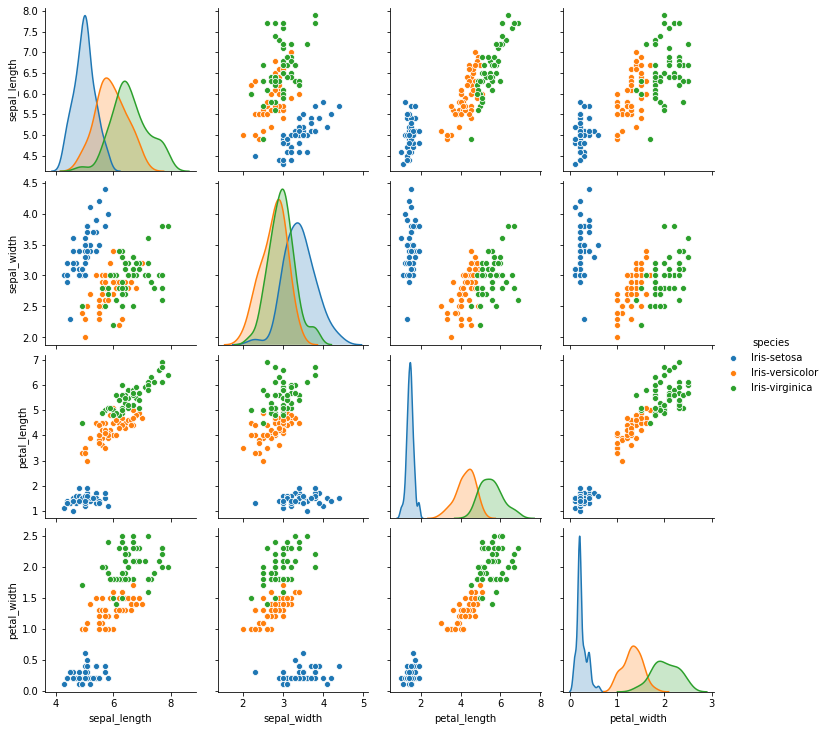

In [9]:
'''
다중 분류 분석 실습 → softmax
 아이리스 데이터의 샘플, 속성, 클래스 구분

샘플 수: 150
• 속성 수: 4
- 정보 1: 꽃받침 길이 (sepal length, 단위: cm)
- 정보 2: 꽃받침 넓이 (sepal width, 단위: cm)
- 정보 3: 꽃잎 길이 (petal length, 단위: cm)
- 정보 4: 꽃잎 넓이 (petal width, 단위: cm)
• 클래스: Iris-setosa, Iris-versicolor, Iris-virginica
'''

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
'''
df = pd.read_csv('data/iris.csv', 
                 names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"])
'''
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/싸이킷런 머신러닝(박태정T)/data/iris.csv', 
                 names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"])
print(df.head())

sns.pairplot(df, hue='species') #속성별 연관성 파악
plt.show()

dataset = df.values
X = dataset[:,0:4].astype(float)
Y_obj = dataset[:,4]

from sklearn.preprocessing import LabelEncoder
e = LabelEncoder() # array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])가 array([1,2,3])로 변환
e.fit(Y_obj)
Y = e.transform(Y_obj)

from keras.utils import np_utils
# array([1,2,3])가 다시 array([[1., 0., 0.], [0., 1., 0.], [0., 0., 1.]])로 원-핫 인코딩(one-hot-encoding) 변환
Y_encoded = np_utils.to_categorical(Y)

In [10]:
'''(iris 이어서)
 소프트맥스(softmax) - 총합이 1인 형태로 바꿔서 계산해 주는 함수
합계가 1인 형태로 변환하면 큰 값이 두드러지게 나타나고 작은 값은 더 작아집니다.
이 값이 교차 엔트로피를 지나 [1., 0., 0.]으로 변화하게 되면 우리가 원하는 원-핫 인코딩 값,
즉 하나만 1이고 나머지는 모두 0인 형태로 전환시킬 수 있습니다.
'''
from keras.models import Sequential
from keras.layers.core import Dense
import numpy
import tensorflow as tf

seed = 0
numpy.random.seed(seed) # seed 값 설정
tf.set_random_seed(seed)

model = Sequential() # 모델의 설정
model.add(Dense(16, input_dim=4, activation='relu'))
#최종 출력 값이 3개 중 하나여야 하므로 출력층에 해당하는 Dense의 노드 수를 3으로 설정, 소프트맥스 함수 사요요 
model.add(Dense(3, activation='softmax'))
# 모델 컴파일(다중 분류에 적절한 오차 함수인 categorical_crossentropy를 사용, 최적화 함수로 adam 사용)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 실행(한 번에 입력되는 값은 1개, 전체 샘플이 50회 반복될 때까지 실험을 진행
model.fit(X, Y_encoded, epochs=50, batch_size=1)
print("\n Accuracy: %.4f" % (model.evaluate(X, Y_encoded)[1])) # 결과 출력

Epoch 1/50
150/150 [==============================] - 1s 6ms/step - loss: 1.6259 - acc: 0.3267
Epoch 2/50
150/150 [==============================] - 1s 4ms/step - loss: 1.1405 - acc: 0.4867
Epoch 3/50
150/150 [==============================] - 1s 4ms/step - loss: 0.9412 - acc: 0.4600
Epoch 4/50
150/150 [==============================] - 1s 4ms/step - loss: 0.7898 - acc: 0.7467
Epoch 5/50
150/150 [==============================] - 1s 4ms/step - loss: 0.6669 - acc: 0.7267
Epoch 6/50
150/150 [==============================] - 1s 4ms/step - loss: 0.5636 - acc: 0.8800
Epoch 7/50
150/150 [==============================] - 1s 4ms/step - loss: 0.5080 - acc: 0.8267
Epoch 8/50
150/150 [==============================] - 1s 4ms/step - loss: 0.4558 - acc: 0.9333
Epoch 9/50
150/150 [==============================] - 1s 4ms/step - loss: 0.4287 - acc: 0.8867
Epoch 10/50
150/150 [==============================] - 1s 4ms/step - loss: 0.4070 - acc: 0.8867
Epoch 11/50
150/150 [============================

In [11]:
# 초음파 광물 예측 분석 실습
'''
광물 분류 약 60가지 (p.99 참고)
'''

from keras.models import Sequential
from keras.layers.core import Dense
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy
import tensorflow as tf

seed = 0
numpy.random.seed(seed) # seed 값 설정
tf.set_random_seed(seed)
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/싸이킷런 머신러닝(박태정T)/data/sonar.csv'
                 ,header=None) # 데이터 입력
dataset = df.values
X = dataset[:,0:60]
Y_obj = dataset[:,60]
e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj) # 문자열 변환
model = Sequential() # 모델 설정
model.add(Dense(24, input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy']) # 모델 컴파일
model.fit(X, Y, epochs=200, batch_size=5) # 모델 실행
print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1])) # 결과 출력

# 매우 높은 정확도 출력
# 과적합 방지 원리를 배우고 실습 할 것 

Epoch 1/200
208/208 [==============================] - 0s 2ms/step - loss: 0.2532 - acc: 0.4471
Epoch 2/200
208/208 [==============================] - 0s 729us/step - loss: 0.2457 - acc: 0.5385
Epoch 3/200
208/208 [==============================] - 0s 765us/step - loss: 0.2428 - acc: 0.5385
Epoch 4/200
208/208 [==============================] - 0s 797us/step - loss: 0.2402 - acc: 0.5385
Epoch 5/200
208/208 [==============================] - 0s 812us/step - loss: 0.2349 - acc: 0.5433
Epoch 6/200
208/208 [==============================] - 0s 843us/step - loss: 0.2285 - acc: 0.5529
Epoch 7/200
208/208 [==============================] - 0s 874us/step - loss: 0.2207 - acc: 0.6250
Epoch 8/200
208/208 [==============================] - 0s 823us/step - loss: 0.2162 - acc: 0.6298
Epoch 9/200
208/208 [==============================] - 0s 735us/step - loss: 0.2021 - acc: 0.7067
Epoch 10/200
208/208 [==============================] - 0s 760us/step - loss: 0.1909 - acc: 0.7308
Epoch 11/200
208/208 

In [15]:
'''
과적합 피하기
 과적합(over fitting) - 모델이 학습 데이터셋 안에서는 일정 수준 이상의 예측 정확도를 보이지만, 새로운
데이터에 적용하면 잘 맞지 않는 것
 과적합은 층이 너무 많거나 변수가 복잡해서 발생하기도 하고 테스트셋과 학습셋이 중복될 때 생기기도
합니다
 과적합을 방지 방법 - 학습을 하는 데이터셋과 이를 테스트할 데이터셋을 완전히 구분한 다음 학습과 동
시에 테스트를 병행하며 진행
'''
'''
 머신러닝의 최종 목적 - 과거의 데이터를 토대로 새로운 데이터를 예측하는 것
새로운 데이터에 사용할 모델을 만드는 것
 학습셋만 가지고 평가할때, 층을 더하거나 에포크(epoch) 값을 높여 실행 횟수를 늘리면 정확도가 계속해
서 올라갈 수 있습니다.
 학습 데이터셋만으로 평가한 예측 성공률이 테스트셋에서도 그대로 나타나지는 않습니다.
 학습이 깊어져서 학습셋 내부에서의 성공률은 높아져도 테스트셋에서는 효과가 없다면 과적합이 일어나
고 있는 것입니다.
'''

# 초음파 광물 예측 분석(학습셋과 테스트셋 구분) 실습
from keras.models import Sequential
from keras.layers.core import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy
import tensorflow as tf

seed = 0
numpy.random.seed(seed) # seed 값 설정
tf.set_random_seed(seed)

df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/싸이킷런 머신러닝(박태정T)/data/sonar.csv'
                 , header=None)
dataset = df.values
X = dataset[:,0:60]
Y_obj = dataset[:,60]

e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)

# 학습셋과 테스트셋의 구분
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)
model = Sequential()
model.add(Dense(24, input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=130, batch_size=5)

# 테스트셋에 모델 적용
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

Epoch 1/130
145/145 [==============================] - 0s 3ms/step - loss: 0.2522 - acc: 0.5310
Epoch 2/130
145/145 [==============================] - 0s 810us/step - loss: 0.2463 - acc: 0.5172
Epoch 3/130
145/145 [==============================] - 0s 821us/step - loss: 0.2440 - acc: 0.5379
Epoch 4/130
145/145 [==============================] - 0s 762us/step - loss: 0.2420 - acc: 0.5310
Epoch 5/130
145/145 [==============================] - 0s 755us/step - loss: 0.2398 - acc: 0.5448
Epoch 6/130
145/145 [==============================] - 0s 780us/step - loss: 0.2382 - acc: 0.5517
Epoch 7/130
145/145 [==============================] - 0s 813us/step - loss: 0.2340 - acc: 0.5448
Epoch 8/130
145/145 [==============================] - 0s 800us/step - loss: 0.2302 - acc: 0.5586
Epoch 9/130
145/145 [==============================] - 0s 873us/step - loss: 0.2209 - acc: 0.6483
Epoch 10/130
145/145 [==============================] - 0s 751us/step - loss: 0.2127 - acc: 0.6552
Epoch 11/130
145/145 

In [17]:
# 초음파 광물 예측 분석 - 모델 저장과 재사용
from keras.models import load_model

model = Sequential()
model.add(Dense(24, input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=130, batch_size=5)
model.save('/content/drive/My Drive/Colab Notebooks/싸이킷런 머신러닝(박태정T)/data/output/my_model.h5') # 모델을 컴퓨터에 저장

del model # 테스트를 위해 메모리 내의 모델을 삭제
model = load_model('/content/drive/My Drive/Colab Notebooks/싸이킷런 머신러닝(박태정T)/data/output/my_model.h5') 
          # 모델을 새로 불러옴

print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1])) # 불러온 모델로 테스트 실행

Epoch 1/130
145/145 [==============================] - 1s 4ms/step - loss: 0.2474 - acc: 0.5379
Epoch 2/130
145/145 [==============================] - 0s 862us/step - loss: 0.2377 - acc: 0.6138
Epoch 3/130
145/145 [==============================] - 0s 742us/step - loss: 0.2334 - acc: 0.6483
Epoch 4/130
145/145 [==============================] - 0s 753us/step - loss: 0.2254 - acc: 0.6621
Epoch 5/130
145/145 [==============================] - 0s 902us/step - loss: 0.2159 - acc: 0.6966
Epoch 6/130
145/145 [==============================] - 0s 744us/step - loss: 0.2058 - acc: 0.6759
Epoch 7/130
145/145 [==============================] - 0s 790us/step - loss: 0.1954 - acc: 0.7172
Epoch 8/130
145/145 [==============================] - 0s 918us/step - loss: 0.1879 - acc: 0.6897
Epoch 9/130
145/145 [==============================] - 0s 954us/step - loss: 0.1870 - acc: 0.7793
Epoch 10/130
145/145 [==============================] - 0s 1ms/step - loss: 0.1732 - acc: 0.7655
Epoch 11/130
145/145 [=

In [20]:
'''
k겹 교차 검증
 k겹 교차 검증(k-fold cross validation) - k겹 교차 검증이란 데이터셋을 여러 개로 나누어 하나씩 테스트
셋으로 사용하고 나머지를 모두 합해서 학습셋으로 사용하는 방법
 데이터가 충분치 않은 경우, 데이터의 100%를 테스트셋으로 사용할 수 있습니다.
'''

#초음파 광물 예측 분석 - k겹 교차 검증
'''
10개의 파일로 쪼개 테스트하는 10-fold cross validation을 실시하도록 n_fold의 값을 10으로 설정한
뒤 StratifiedKFold() 함수에 적용했습니다. 그런 다음 모델을 만들고 실행하는 부분을 for 구문으로 묶어 n_fold만큼
반복되게 합니다.
'''
from sklearn.model_selection import StratifiedKFold
n_fold = 10
skf = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=seed)

accuracy = [] # 빈 accuracy 배열

for train, test in skf.split(X, Y): # 모델의 설정, 컴파일, 실행
    model = Sequential()
    model.add(Dense(24, input_dim=60, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    model.fit(X[train], Y[train], epochs=100, batch_size=5)
    k_accuracy = "%.4f" % (model.evaluate(X[test], Y[test])[1])
    accuracy.append(k_accuracy)

# 결과 출력
print("\n %.f fold accuracy:" % n_fold, accuracy)

Epoch 1/100
187/187 [==============================] - 1s 4ms/step - loss: 0.2456 - acc: 0.5348
Epoch 2/100
187/187 [==============================] - 0s 828us/step - loss: 0.2401 - acc: 0.5829
Epoch 3/100
187/187 [==============================] - 0s 847us/step - loss: 0.2325 - acc: 0.5775
Epoch 4/100
187/187 [==============================] - 0s 845us/step - loss: 0.2238 - acc: 0.6578
Epoch 5/100
187/187 [==============================] - 0s 869us/step - loss: 0.2160 - acc: 0.6791
Epoch 6/100
187/187 [==============================] - 0s 938us/step - loss: 0.2084 - acc: 0.7059
Epoch 7/100
187/187 [==============================] - 0s 811us/step - loss: 0.1964 - acc: 0.7594
Epoch 8/100
187/187 [==============================] - 0s 791us/step - loss: 0.1853 - acc: 0.7968
Epoch 9/100
187/187 [==============================] - 0s 831us/step - loss: 0.1737 - acc: 0.7914
Epoch 10/100
187/187 [==============================] - 0s 839us/step - loss: 0.1641 - acc: 0.7914
Epoch 11/100
187/187 

In [22]:
'''
와인의 종류 예측 분석
 총 6497개의 샘플
 13개의 속성
'''
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
import pandas as pd
import numpy
import tensorflow as tf
import matplotlib.pyplot as plt

seed = 0
numpy.random.seed(seed) # seed 값 설정
tf.set_random_seed(seed)

df_pre = pd.read_csv('/content/drive/My Drive/Colab Notebooks/싸이킷런 머신러닝(박태정T)/data/wine.csv', header=None)
df = df_pre.sample(frac=1) #rac = 1 지정은 원본 데이터의 100%를 불러오라는 의미
dataset = df.values
X = dataset[:,0:12]
Y = dataset[:,12]

model = Sequential() # 모델 설정(4개의 은닉층을 만들어 각각 30, 12, 8, 1개의 노드를 주었습니다)
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) # 모델 컴파일
model.fit(X, Y, epochs=200, batch_size=200) # 모델 실행
print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1])) # 결과 출력

Epoch 1/200
6497/6497 [==============================] - 1s 178us/step - loss: 0.3857 - acc: 0.8038
Epoch 2/200
6497/6497 [==============================] - 0s 27us/step - loss: 0.2715 - acc: 0.9024
Epoch 3/200
6497/6497 [==============================] - 0s 26us/step - loss: 0.2205 - acc: 0.9324
Epoch 4/200
6497/6497 [==============================] - 0s 28us/step - loss: 0.2039 - acc: 0.9355
Epoch 5/200
6497/6497 [==============================] - 0s 25us/step - loss: 0.1946 - acc: 0.9378
Epoch 6/200
6497/6497 [==============================] - 0s 28us/step - loss: 0.1863 - acc: 0.9381
Epoch 7/200
6497/6497 [==============================] - 0s 24us/step - loss: 0.1838 - acc: 0.9401
Epoch 8/200
6497/6497 [==============================] - 0s 24us/step - loss: 0.1768 - acc: 0.9407
Epoch 9/200
6497/6497 [==============================] - 0s 24us/step - loss: 0.1742 - acc: 0.9403
Epoch 10/200
6497/6497 [==============================] - 0s 27us/step - loss: 0.1680 - acc: 0.9427
Epoch 11

In [32]:
## 와인의 종류 예측 분석 – 모델 업데이트

# 에포크(epoch)마다 모델의 정확도를 함께 기록하면서 저장
from keras.callbacks import ModelCheckpoint
import os 

# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# 모델 저장 폴더 설정
MODEL_DIR = '/content/drive/My Drive/Colab Notebooks/싸이킷런 머신러닝(박태정T)/data/output/model(wine)'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

# 테스트 오차는 케라스 내부에서 val_loss, 학습 정확도는 acc, 
# 테스트셋 정확도는 val_acc, 학습셋 오차는 loss로 각각 기록됩니다

# 모델 저장 조건 설정
modelpath="/content/drive/My Drive/Colab Notebooks/싸이킷런 머신러닝(박태정T)/data/output/model(wine)/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
# 모델 실행 및 저장
model.fit(X, Y, validation_split=0.2, epochs=200, batch_size=200,verbose=0, callbacks=[checkpointer])


Epoch 00001: val_loss improved from inf to 0.04092, saving model to /content/drive/My Drive/Colab Notebooks/싸이킷런 머신러닝(박태정T)/data/output/model(wine)/01-0.0409.hdf5

Epoch 00002: val_loss did not improve from 0.04092

Epoch 00003: val_loss did not improve from 0.04092

Epoch 00004: val_loss improved from 0.04092 to 0.04081, saving model to /content/drive/My Drive/Colab Notebooks/싸이킷런 머신러닝(박태정T)/data/output/model(wine)/04-0.0408.hdf5

Epoch 00005: val_loss did not improve from 0.04081

Epoch 00006: val_loss improved from 0.04081 to 0.04062, saving model to /content/drive/My Drive/Colab Notebooks/싸이킷런 머신러닝(박태정T)/data/output/model(wine)/06-0.0406.hdf5

Epoch 00007: val_loss did not improve from 0.04062

Epoch 00008: val_loss did not improve from 0.04062

Epoch 00009: val_loss did not improve from 0.04062

Epoch 00010: val_loss did not improve from 0.04062

Epoch 00011: val_loss did not improve from 0.04062

Epoch 00012: val_loss did not im

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
4352/4352 [==============================] - 0s 13us/step - loss: 0.0232 - acc: 0.9952 - val_loss: 0.0382 - val_acc: 0.9921
Epoch 1002/3500
4352/4352 [==============================] - 0s 13us/step - loss: 0.0237 - acc: 0.9938 - val_loss: 0.0410 - val_acc: 0.9911
Epoch 1003/3500
4352/4352 [==============================] - 0s 13us/step - loss: 0.0256 - acc: 0.9938 - val_loss: 0.0398 - val_acc: 0.9921
Epoch 1004/3500
4352/4352 [==============================] - 0s 14us/step - loss: 0.0250 - acc: 0.9938 - val_loss: 0.0385 - val_acc: 0.9916
Epoch 1005/3500
4352/4352 [==============================] - 0s 13us/step - loss: 0.0261 - acc: 0.9922 - val_loss: 0.0375 - val_acc: 0.9935
Epoch 1006/3500
4352/4352 [==============================] - 0s 14us/step - loss: 0.0248 - acc: 0.9940 - val_loss: 0.0371 - val_acc: 0.9916
Epoch 1007/3500
4352/4352 [==============================] - 0s 15us/step - loss: 0.0254 - acc: 0.9936 - val_loss: 0.0373 - val_acc: 0.9925


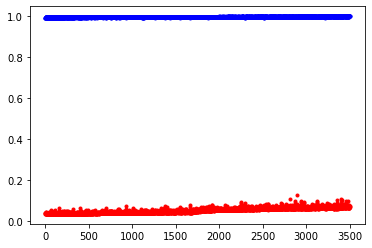

In [33]:
# 그래프 표현
import matplotlib.pyplot as plt

# 모델 실행 및 저장
# sample() 함수를 이용하여 전체 샘플 중 15%만 불러오게 하고, 배치 크기는 500으로 늘려 한 번 딥러닝을 가동할
# 때 더 많이 입력되게끔 했습니다. 불러온 샘플 중 33%는 분리하여 테스트셋으로 사용하였습니다.
history = model.fit(X, Y, validation_split=0.33, epochs=3500, batch_size=500)

# y_vloss에 테스트셋(33%)으로 실험 결과의 오차 값을 저장
y_vloss=history.history['val_loss']

# y_acc에 학습셋(67%)으로 측정한 정확도의 값을 저장
y_acc=history.history['acc']

# x 값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = numpy.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)
plt.show()

In [36]:
# 학습의 자동 중단 적용
# 좀전의 학습이 도저히 끝날생각을 안한다(epoch 3500)
# 학습이 진행될수록 학습셋의 정확도는 올라가지만 과적합으로 인해 테스트셋의 실험 결과는 점점 나빠지게 됩니다.
# 케라스에는 학습이 진행되어도 테스트셋 오차가 줄지 않으면 학습을 멈추게 하는 함수가 있습니다.
from keras.callbacks import EarlyStopping

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# 자동 중단 설정(EarlyStopping() 함수에 모니터할 값과 테스트 오차가 좋아지지 않아도 몇 번까지 기다릴지를 정합니다.)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)
# 모델 실행
model.fit(X, Y, validation_split=0.2, epochs=2000, batch_size=500, callbacks=[early_stopping_callback])
# 결과 출력
print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))

Train on 5197 samples, validate on 1300 samples
Epoch 1/2000
5197/5197 [==============================] - 1s 268us/step - loss: 0.0244 - acc: 0.9946 - val_loss: 0.0773 - val_acc: 0.9900
Epoch 2/2000
5197/5197 [==============================] - 0s 14us/step - loss: 0.0245 - acc: 0.9933 - val_loss: 0.0779 - val_acc: 0.9900
Epoch 3/2000
5197/5197 [==============================] - 0s 12us/step - loss: 0.0205 - acc: 0.9944 - val_loss: 0.0746 - val_acc: 0.9908
Epoch 4/2000
5197/5197 [==============================] - 0s 12us/step - loss: 0.0192 - acc: 0.9952 - val_loss: 0.0740 - val_acc: 0.9915
Epoch 5/2000
5197/5197 [==============================] - 0s 12us/step - loss: 0.0191 - acc: 0.9950 - val_loss: 0.0715 - val_acc: 0.9908
Epoch 6/2000
5197/5197 [==============================] - 0s 14us/step - loss: 0.0193 - acc: 0.9952 - val_loss: 0.0723 - val_acc: 0.9915
Epoch 7/2000
5197/5197 [==============================] - 0s 13us/step - loss: 0.0197 - acc: 0.9956 - val_loss: 0.0731 - val_acc:

In [0]:
'''
선형 회귀 적용- 보스턴 집값 예측 분석
 1978년, 집값에 가장 큰 영향을 미치는 것이 ‘깨끗한 공기’라는 연구 결과가 하버드대학교 도시개발학과에
서 발표
 집값의 변동에 영향을 미치는 여러 가지 요인을 모아서 환경과 집값의 변동을 보여주는 데이터셋 - 머신
러닝의 선형 회귀를 테스트하는 가장 유명한 데이터로 쓰이고 있음
 수치를 예측하는 문제 (선형 회귀 문제)
 머신러닝 혹은 딥러닝을 위해 주어진 데이터의 답을 구하는 문제 (여러 개 중에 정답을 맞히거나, 가격, 성
적 같은 수치를 맞히는 것)
 506 entries, 14 columns (13개의 속성과 1개의 클래스로 이루어졌음)
'''
'''
CRIM     인구 1인당 범죄 발생 수
ZN       25,000평방 피트 이상의 주거 구역 비중
INDUS    소매업 외 상업이 차지하는 면적 비율
CHAS     찰스강 위치 변수(1: 강 주변, 0: 이외)
NOX      일산화질소 농도
RM       집의 평균 방 수
AGE      1940년 이전에 지어진 비율
DIS      5가지 보스턴 시 고용 시설까지의 거리
RAD      순환고속도로의 접근 용이성
TAX      $10,000당 부동산 세율 총계
PTRATIO  지역별 학생과 교사 비율
B        지역별 흑인 비율
LSTAT    급여가 낮은 직업에 종사하는 인구 비율(%)
         가격(단위: $1,000)
'''
'''
 선형 회귀 데이터는 마지막에 참과 거짓을 구분할 필요가 없기 때문에 출력층에 활성화 함수를 지정할 필
요도 없습니다.
 모델의 학습이 어느 정도 되었는지 확인하기 위해 예측 값과 실제 값을 비교하는 부분을 추가합니다.
'''
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import numpy
import pandas as pd
import tensorflow as tf

seed = 0
numpy.random.seed(seed) # seed 값 설정
tf.set_random_seed(seed)

df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/싸이킷런 머신러닝(박태정T)/data/housing.csv", delim_whitespace=True, header=None)
dataset = df.values
X = dataset[:,0:13]
Y = dataset[:,13]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)

In [41]:
# 모델 설정 
model = Sequential()
model.add(Dense(30, input_dim=13, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, Y_train, epochs=200, batch_size=10)
#flatten() - 데이터 배열이 몇 차원이든 모두 1차원으로 바꿔 읽기 쉽게 해 주는 함수
Y_prediction = model.predict(X_test).flatten() # 예측 값과 실제 값의 비교
for i in range(10):
    label = Y_test[i]
    prediction = Y_prediction[i]
    print("실제가격: {:.3f}, 예상가격: {:.3f}".format(label, prediction))



Epoch 1/200
354/354 [==============================] - 1s 4ms/step - loss: 73.7544
Epoch 2/200
354/354 [==============================] - 0s 453us/step - loss: 63.4390
Epoch 3/200
354/354 [==============================] - 0s 418us/step - loss: 57.9993
Epoch 4/200
354/354 [==============================] - 0s 474us/step - loss: 53.2910
Epoch 5/200
354/354 [==============================] - 0s 455us/step - loss: 57.2137
Epoch 6/200
354/354 [==============================] - 0s 396us/step - loss: 53.4243
Epoch 7/200
354/354 [==============================] - 0s 399us/step - loss: 52.6130
Epoch 8/200
354/354 [==============================] - 0s 408us/step - loss: 48.5036
Epoch 9/200
354/354 [==============================] - 0s 427us/step - loss: 51.5769
Epoch 10/200
354/354 [==============================] - 0s 411us/step - loss: 47.3230
Epoch 11/200
354/354 [==============================] - 0s 415us/step - loss: 44.7591
Epoch 12/200
354/354 [==============================] - 0s 438us/